In [1]:
# Import necessary pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
df_raw = pd.read_csv('./data/sales.csv')
df_raw.head()

,date,city,product,units,unit_price,discount
0,2025-02-01,New York,Laptop,2,1200,0.10
1,2025-02-02,Los Angeles,Phone,5,850,0.05
2,2025-02-03,Chicago,Tablet,3,480,0.00
3,2025-02-04,Houston,Monitor,4,310,0.12
4,2025-02-05,Phoenix,Keyboard,8,55,0.00


In [4]:
# Create a clean copy of the data for analysis
df=df_raw.copy()
# Fill missing values in the "discount" column with 0
df["discount"] = df["discount"].fillna(0)

In [5]:
# Drop rows where "units" is missing, as we cannot analyze sales without knowing the number of units sold
df=df.dropna(subset=["units"])

In [8]:
# Convert 'date' column to datetime format, coercing errors to NaT
df["date"] = pd.to_datetime(df["date"], errors='coerce')
# Enforce numeric types for 'units' and 'unit_price', coercing errors to NaN
df["units"]= pd.to_numeric(df["units"], errors='coerce')
df["unit_price"]= pd.to_numeric(df["unit_price"], errors='coerce')
df["discount"]= pd.to_numeric(df["discount"], errors='coerce')

# Drop any invalid rows that could not be converted to the correct types
df=df.dropna(subset=["date", "units", "unit_price", "discount"])

# Final type casting after cleaning
df["units"]=df["units"].astype(int)
df["unit_price"]=df["unit_price"].astype(float)
df["discount"]=df["discount"].astype(float)

In [10]:
# Feature engineering: Calculate total sales amount after discount
df["gross"] = df["units"] * df["unit_price"]
df["net"] = df["gross"] - (1.0 - df["discount"])

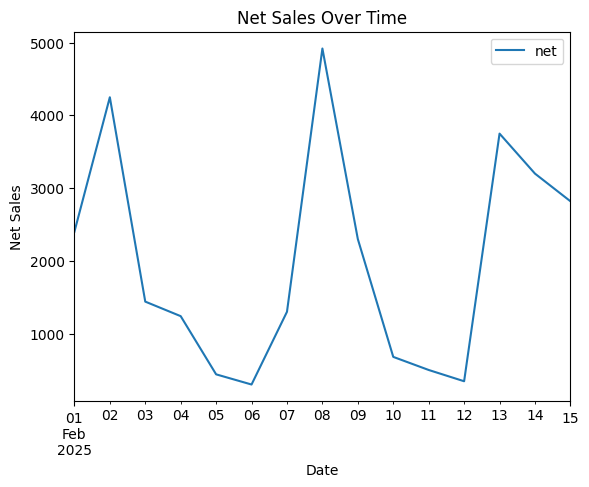

In [11]:
df.plot(x="date", y="net", kind="line")
plt.title("Net Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.show()